1first7.csv


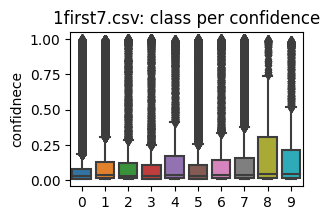

2second3.csv


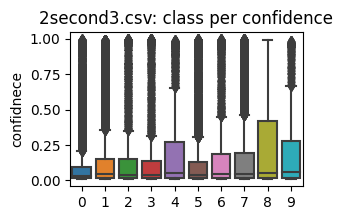

4convnext07.csv


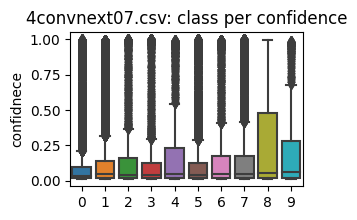

5convnext_fold5.csv


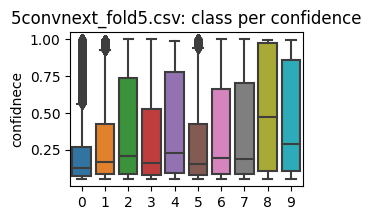

6convnext04.csv


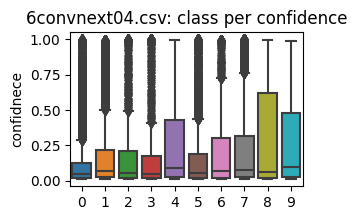

7convnext_Base.csv


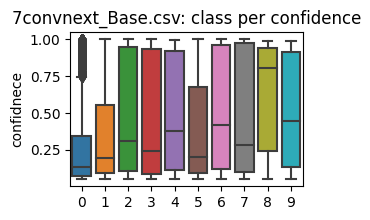

8tta_swin.csv


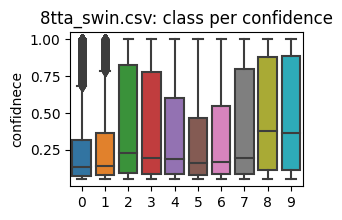

ConvNeXt.csv


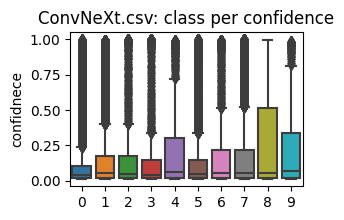

Swin.csv


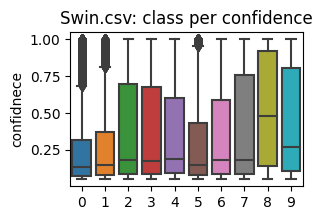

YOLO.csv


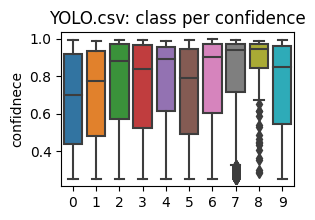

a11fasterrcnn.csv


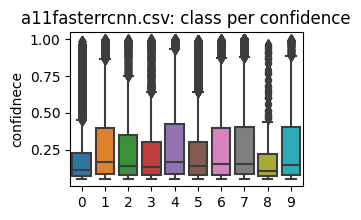

ensemble.csv


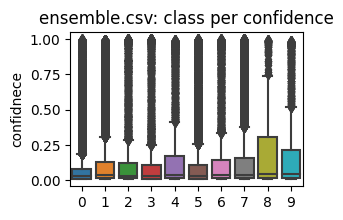

In [13]:
# get os list
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
file_list = os.listdir('./xxx/')

file_list.sort()
for i,file in enumerate(file_list):
    print(file)
    data = pd.read_csv(f'./xxx/{file}')

    data['PredictionString'].fillna('', inplace=True)
    n = len(data['PredictionString'])

    class_confidence = [[] for _ in range(10)]
    for i in range(n):
        pred = data['PredictionString'][i]
        pred = list(map(float, pred.split()))
        for j in range(0, len(pred), 6):
            class_confidence[int(pred[j])].append(float(pred[j+1]))

    # visualize list
    df = pd.DataFrame(class_confidence)
    df = df.transpose()
    #df.columns = ['General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
    df.columns = [i for i in range(10)]
    plt.figure(figsize=(3, 2))
    sns.boxplot(data=df)
    plt.title(f'{file}: class per confidence')
    plt.ylabel('confidnece')

    plt.show()
